# <div style="text-align: center">Learning Models: DT and NN</div>

<div style="text-align: center"> <sub>ENCI646</sub></div>

$\,$

<div style="text-align: center"> University of Canterbury </div>

$\,$

### Notebook instructions

Run cells containing code by clicking on them and hitting **Ctrl+Enter** or by Cell>Run Cells in the drop-down menu.

#### Contents
- Learning Algorithms: : DT and NN

## Learning Algorithms

In [1]:
# imports
import pandas as pd
import numpy as np
# Enable inline plotting
%matplotlib inline

### 6.1 Decision Trees

In [2]:
# Synthetic dataset describing some regions prone to floods. 
# For each, the rainfall, and saturation level is recorded.
# An assessment of whether the area has flooded is included as a binary variable.
data = [
    {"rainfall": 10, "saturation": 90, "flood": True},
    {"rainfall": 60, "saturation": 15, "flood": False},
    {"rainfall": 70, "saturation": 75, "flood": True},
    {"rainfall": 20, "saturation": 35, "flood": False},
    {"rainfall": 50, "saturation": 50, "flood": True},
    {"rainfall": 75, "saturation": 5, "flood": False},
    {"rainfall": 30, "saturation": 3, "flood": False},
    {"rainfall": 25, "saturation": 65, "flood": False},
    {"rainfall": 40, "saturation": 80, "flood": True},
    {"rainfall": 35, "saturation": 20, "flood": False},
    {"rainfall": 45, "saturation": 60, "flood": True},
    {"rainfall": 15, "saturation": 85, "flood": True},
    {"rainfall": 55, "saturation": 45, "flood": True},
    {"rainfall": 65, "saturation": 10, "flood": False},
    {"rainfall": 80, "saturation": 25, "flood": False},
    {"rainfall": 30, "saturation": 40, "flood": False},
    {"rainfall": 50, "saturation": 70, "flood": True},
    {"rainfall": 70, "saturation": 55, "flood": True},
    {"rainfall": 20, "saturation": 10, "flood": False},
    {"rainfall": 45, "saturation": 65, "flood": True},
    {"rainfall": 35, "saturation": 15, "flood": False},
    {"rainfall": 60, "saturation": 30, "flood": False},
    {"rainfall": 25, "saturation": 85, "flood": True},
]
df = pd.DataFrame(data)
print(df)

# We wish to develop a model that can predict whether an area is likely to flood based on its rainfall, soil property, and saturation.

    rainfall  saturation  flood
0         10          90   True
1         60          15  False
2         70          75   True
3         20          35  False
4         50          50   True
5         75           5  False
6         30           3  False
7         25          65  False
8         40          80   True
9         35          20  False
10        45          60   True
11        15          85   True
12        55          45   True
13        65          10  False
14        80          25  False
15        30          40  False
16        50          70   True
17        70          55   True
18        20          10  False
19        45          65   True
20        35          15  False
21        60          30  False
22        25          85   True


In [3]:
# For this problem, we will use a decision tree that splits the dataset into subsets.
# Run this cell to see how a dataframe is split into two subsets, according to a feature and value
feature = 'rainfall'
split = 50

# Split the dataset based on the rainfall threshold
print("Subset where rainfall <= 100 mm:")
print(df.loc[df[feature] <= split])

print("\nSubset where rainfall > 100 mm:")
print(df.loc[df[feature] > split])


Subset where rainfall <= 100 mm:
    rainfall  saturation  flood
0         10          90   True
3         20          35  False
4         50          50   True
6         30           3  False
7         25          65  False
8         40          80   True
9         35          20  False
10        45          60   True
11        15          85   True
15        30          40  False
16        50          70   True
18        20          10  False
19        45          65   True
20        35          15  False
22        25          85   True

Subset where rainfall > 100 mm:
    rainfall  saturation  flood
1         60          15  False
2         70          75   True
5         75           5  False
12        55          45   True
13        65          10  False
14        80          25  False
17        70          55   True
21        60          30  False


In [4]:
from enci646 import decision_tree
# run this cell below, and then use the controls below to complete the tasks
decision_tree()

# TASK 1
# Move the top slider to divide the dataset, trying both features (rainfall and saturation).
# Try to separate the flooded and non-flooded areas as much as possible.
# When you are satisfied with the split of data, check the box to lock the root node.


# TASK 2
# Repeat the exercise for the bottom lefthand and righthand sliders below.
# Further separate and subdivide the data, trying to distinguish the two binary classes (flooded and not flooded).
# Can you construct a decision tree that classifies whether an area will flood based on the features: rainfall, and saturation?

# Consider the original dataframe given in the cells above. Which part is the feature matrix X, and
# which is the label vector y?

# What are the parameters of this model? 

# TASK 3
# Suppose you are given a new region: rainfall of 45 mm, and 60% soil saturation. What would your model predict? 

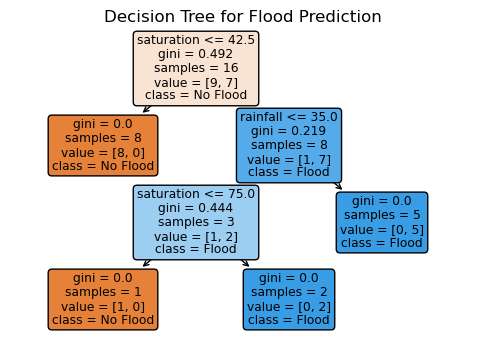

In [5]:
# Import necessary libraries for decision tree and plotting
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df[['rainfall', 'saturation']]  # Independent variables
y = df['flood']  # Dependent variable (flood prediction)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(6, 4))
plot_tree(clf, feature_names=X.columns, class_names=['No Flood', 'Flood'], filled=True, rounded=True)
plt.title('Decision Tree for Flood Prediction')
plt.show()

### 6.2 Neural Networks

In [6]:
# Neural network prediction of runoff, based on current and previous rainfall
# note, all numbers have been normalized for convenience

# feature matrix
# columns: current rainfall, previous hour rainfall, previous runoff
X = np.array([[0,0,1],        # rainfall has stopped, some runoff remains
              [0,1,1],          # **describe**
              [1,1,0],          # **describe**
              [1,1,1]])         # **describe**

# label vector: amount of current runoff
y = np.array([[0.1],
              [0.6],
              [0.4],
              [1.0]])

# prediction: what will be the runoff for these features?
predict=np.array([[0.5, 0.3, 0.8],])

# run the cell below and then complete the tasks
from enci646 import neural_network
neural_network(X,y,predict)

# TASK 0: model setup
# consider the partial description of the feature matrix above, and complete the remaining rows
# turn on the labels and read the descriptions of the model parts
# each connector is an activation function - its color and thickness denote its weight (red=positive, blue=negative)

# TASK 1: model training
# (turn on labels if you are not sure what you are looking at)
# how does the number of circles in the input layer reflect the input data?
# is the number of circles in the hidden layer a parameter or a hyperparameter?

# the model is initalized with random weights - use the slider to start training it
# how does total error change as the number of training steps is increased?
# how do the weights change during training?

# use the slider to visualize a datapoint (a row of the feature matrix)
# how does training improve the model prediction and the true label?

# TASK 2: model prediction
# which feature has the greatest total weight of connectors leaving it?
# turn the prediction - does the answer make sense? Try a different prediction.

# EXTRA:
# make some changes to input features or labels and see how things change.